In [112]:
#Portfolio Allocation

In [11]:
import pandas as pd
import quandl

In [17]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

In [18]:
quandl.ApiConfig.api_key = "WyE8MEWkdKpPHyZ8m9fT"

In [19]:
appl=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco=quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm=quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [20]:
appl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [21]:
appl.iloc[0]['Adj. Close']

52.848786580038

In [22]:
for stock_df in (appl,cisco,ibm,amzn):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']#Cummulative Daily Return

In [23]:
appl

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
...,...,...
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034


In [13]:
#30% in apple
#20% in cisco
#40% in amazon
#10% in ibm

In [24]:
for stock_df, allo in zip((appl,cisco,amzn,ibm),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

In [25]:
amzn

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,179.03,1.000000,0.400000
2012-01-04,177.51,0.991510,0.396604
2012-01-05,177.61,0.992068,0.396827
2012-01-06,182.61,1.019997,0.407999
2012-01-09,178.56,0.997375,0.398950
...,...,...,...
2016-12-23,760.59,4.248394,1.699358
2016-12-27,771.40,4.308775,1.723510
2016-12-28,772.13,4.312853,1.725141


In [31]:
for stock_df, allo in zip((appl,cisco,amzn,ibm),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation']=stock_df['Normed Return']*allo
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [26]:
amzn

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,179.03,1.000000,0.400000
2012-01-04,177.51,0.991510,0.396604
2012-01-05,177.61,0.992068,0.396827
2012-01-06,182.61,1.019997,0.407999
2012-01-09,178.56,0.997375,0.398950
...,...,...,...
2016-12-23,760.59,4.248394,1.699358
2016-12-27,771.40,4.308775,1.723510
2016-12-28,772.13,4.312853,1.725141


In [29]:
appl

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660
...,...,...,...
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610


In [32]:
all_pos_vals=[appl['Position Values'],cisco['Position Values'],amzn['Position Values'],ibm['Position Values']]

portfolio_val=pd.concat(all_pos_vals,axis=1)

In [33]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,4.000000e+05,100000.000000
2012-01-04,301612.236461,203864.734300,3.966039e+05,99592.055824
2012-01-05,304960.727573,203113.258186,3.968273e+05,99119.699410
2012-01-06,308148.724558,202361.782072,4.079987e+05,97981.749866
2012-01-09,307659.946988,203650.026838,3.989499e+05,97471.819646
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,1.699358e+06,101839.988903
2016-12-27,657413.396830,379323.596496,1.723510e+06,102102.667778
2016-12-28,654610.167268,376108.989746,1.725141e+06,101522.330729


In [34]:
portfolio_val.columns=['APPL Position Values','CISCO Position Values','AMZN Position Values','IBM Position Values']

In [35]:
portfolio_val

,APPL Position Values,CISCO Position Values,AMZN Position Values,IBM Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,4.000000e+05,100000.000000
2012-01-04,301612.236461,203864.734300,3.966039e+05,99592.055824
2012-01-05,304960.727573,203113.258186,3.968273e+05,99119.699410
2012-01-06,308148.724558,202361.782072,4.079987e+05,97981.749866
2012-01-09,307659.946988,203650.026838,3.989499e+05,97471.819646
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,1.699358e+06,101839.988903
2016-12-27,657413.396830,379323.596496,1.723510e+06,102102.667778
2016-12-28,654610.167268,376108.989746,1.725141e+06,101522.330729


In [36]:
portfolio_val['Total Position']=portfolio_val.sum(axis=1)

In [37]:
portfolio_val

,APPL Position Values,CISCO Position Values,AMZN Position Values,IBM Position Values,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,4.000000e+05,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,3.966039e+05,99592.055824,1.001673e+06
2012-01-05,304960.727573,203113.258186,3.968273e+05,99119.699410,1.004021e+06
2012-01-06,308148.724558,202361.782072,4.079987e+05,97981.749866,1.016491e+06
2012-01-09,307659.946988,203650.026838,3.989499e+05,97471.819646,1.007732e+06
...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,1.699358e+06,101839.988903,2.831931e+06
2016-12-27,657413.396830,379323.596496,1.723510e+06,102102.667778,2.862350e+06
2016-12-28,654610.167268,376108.989746,1.725141e+06,101522.330729,2.857383e+06


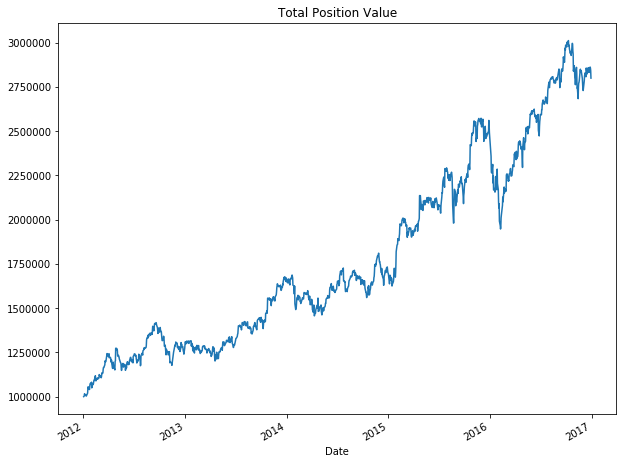

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Position Value');

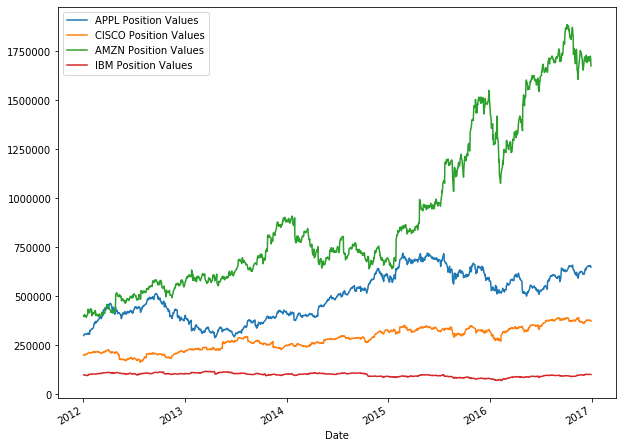

In [40]:
portfolio_val.drop('Total Position',axis=1).plot(figsize=(10,8));

In [41]:
portfolio_val['Daily Return']=portfolio_val['Total Position'].pct_change(1)

In [42]:
portfolio_val

,APPL Position Values,CISCO Position Values,AMZN Position Values,IBM Position Values,Total Position,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,4.000000e+05,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,3.966039e+05,99592.055824,1.001673e+06,0.001673
2012-01-05,304960.727573,203113.258186,3.968273e+05,99119.699410,1.004021e+06,0.002344
2012-01-06,308148.724558,202361.782072,4.079987e+05,97981.749866,1.016491e+06,0.012420
2012-01-09,307659.946988,203650.026838,3.989499e+05,97471.819646,1.007732e+06,-0.008617
...,...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,1.699358e+06,101839.988903,2.831931e+06,-0.003836
2016-12-27,657413.396830,379323.596496,1.723510e+06,102102.667778,2.862350e+06,0.010741
2016-12-28,654610.167268,376108.989746,1.725141e+06,101522.330729,2.857383e+06,-0.001735


In [43]:
portfolio_val['Daily Return'].mean()

0.000902357907176961

In [44]:
portfolio_val['Daily Return'].std()

0.012896893878458078

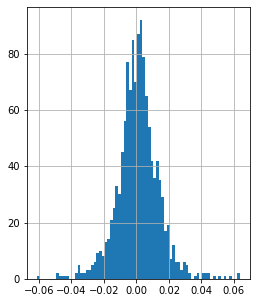

In [45]:
portfolio_val['Daily Return'].hist(bins=75,figsize=(4,5));

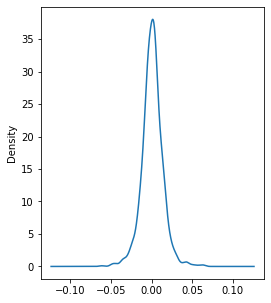

In [46]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5));

In [47]:
cumulative_return=100*(((portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0])-2))

In [48]:
cumulative_return

79.9782822000091

In [49]:
portfolio_val['Total Position'][-1]

2799782.822000091

In [50]:
portfolio_val['Total Position'][0]

1000000.0

In [51]:
sharpe_ratio=(portfolio_val['Daily Return'].mean())/(portfolio_val['Daily Return'].std())

In [52]:
sharpe_ratio

0.069967072357181

In [53]:
sharpe_ratio_annual=(sharpe_ratio)*(252**0.5)

In [54]:
sharpe_ratio_annual

1.1106928405221763

In [113]:
#Portfolio Optimization

In [55]:
appl=pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco=pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn=pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [56]:
appl

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089
...,...
2016-12-23,115.547742
2016-12-27,116.281568
2016-12-28,115.785740


In [57]:
stocks=pd.concat([appl,cisco,ibm,amzn],axis=1)
stocks.columns=['appl','cisco','ibm','amzn']

In [58]:
stocks

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [59]:
stocks.pct_change(1).mean()

appl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [60]:
stocks.pct_change(1).corr()

,appl,cisco,ibm,amzn
appl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [61]:
stocks.pct_change(1).head()

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [62]:
import numpy as np

In [63]:
log_ret=np.log(stocks/stocks.shift(1))
log_ret.head()

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


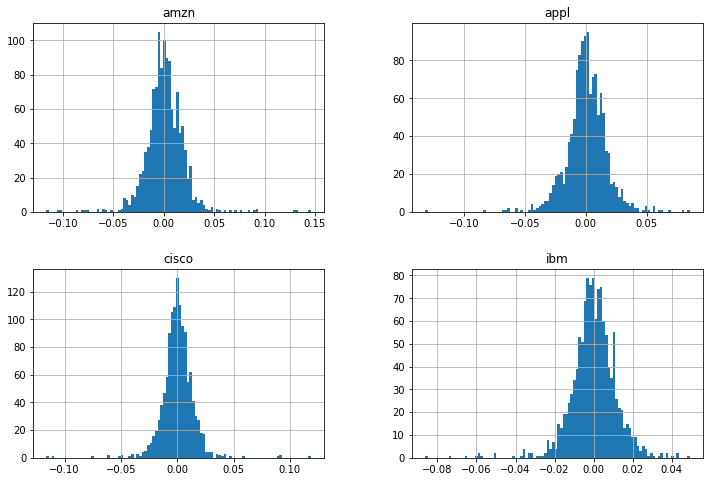

In [64]:
log_ret.hist(bins=100,figsize=(12,8));

In [65]:
log_ret.mean()

appl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [66]:
log_ret.cov()*252

,appl,cisco,ibm,amzn
appl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [67]:
np.random.seed(101)

print(stocks.columns)

weights=np.array(np.random.random(4))

print("Random Weights:")
print(weights)

print('Rebalance')
weights=weights/np.sum(weights)
print(weights)

#Expected Return
print('Expected Portfolio Return')
exp_ret=(log_ret.mean()*weights)*252
print(exp_ret)

print('Expected Portfolio Return Sum')
exp_ret_sum=np.sum((log_ret.mean()*weights)*252)
print(exp_ret_sum)

#Expected Variance (Volatility)
print('Expected Variance')
exp_variance=np.sqrt(np.dot(weights. T,np.dot(log_ret.cov()*252,weights)))
print(exp_variance)

#Sharpe Ratio
print('Sharpe Ratio')
sr=exp_ret_sum/exp_variance
print(sr)

#SharpeT Ratio
#print('Sharpe Ratio T')
#srt=(252**0.5)*(exp_ret.mean()/exp_ret.std())
#print(srt)

Index(['appl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
appl     0.062111
cisco    0.055553
ibm      0.000062
amzn     0.038268
dtype: float64
Expected Portfolio Return Sum
0.15599272049632004
Expected Variance
0.18502649565909488
Sharpe Ratio
0.8430831483926032


In [87]:
np.random.seed(101)

num_ports=5000 #nbr of portfolios
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports) #volatility
sharpe_arr=np.zeros(num_ports)

for ind in range(num_ports):    

    #Weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    #Save Weights
    all_weights[ind,:]=weights
    
    #Expected Return
    #exp_ret=(log_ret.mean()*weights)*252
    ret_arr[ind]=np.sum((log_ret.mean()*weights)*252)


    #Expected Variance (Volatility)
    vol_arr[ind]=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]

In [88]:
np.sum((log_ret.mean()*weights)*252)

0.17851880289984326

In [89]:
sharpe_arr.max()

1.0303260551271067

In [90]:
sharpe_arr.argmax()

1420

In [91]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [92]:
max_sr_ret=ret_arr[1420]
max_sr_vol=vol_arr[1420]

In [93]:
max_sr_ret

0.21857805695172433

In [94]:
max_sr_vol

0.2121445496442962

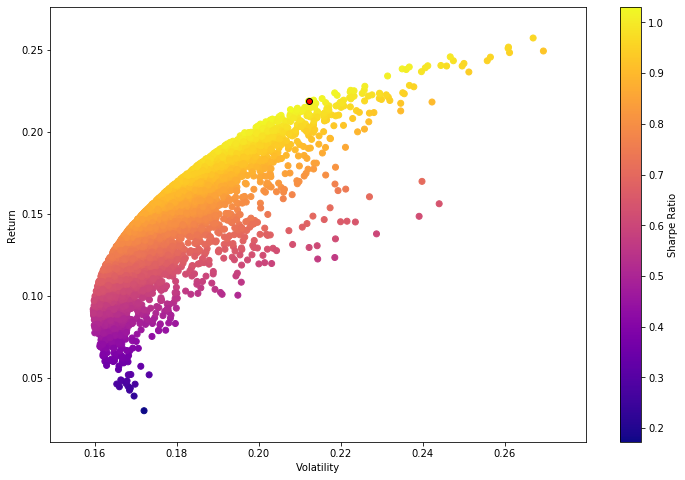

In [95]:
plt.figure(figsize=(12,8));
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

plt.scatter(max_sr_vol,max_sr_ret,c='r',edgecolors='black');

In [96]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum((log_ret.mean()*weights)*252)
    vol=np.sqrt(np.dot(weights. T,np.dot(log_ret.cov()*252,weights)))
    sr=ret/vol
    return np.array(ret,vol,sr)

In [97]:
from scipy.optimize import minimize

In [98]:
def negative_sharpe(weights):
    return (get_ret_vol_sr(weights)[2])*(-1)

In [99]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return (np.sum(weights))-1

In [100]:
cons=({'type':'eq','fun':check_sum})

In [101]:
bounds=((0,1),(0,1),(0,1),(0,1))

In [102]:
init_guess=[0.25,0.25,0.25,0.25]

In [115]:
opt_results=minimize(negative_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

ValueError: only 2 non-keyword arguments accepted

In [117]:
frontier_y=np.linspace(0,0.3,100)

In [118]:
def minimize_volatility(weights):
    return get_ret_vol_sr_(weights)[1]

In [120]:
frontier_volatility=[]
for possible_return in frontier_y:
    cons=({'type':'eq','fun':check_sum},
          {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

ValueError: only 2 non-keyword arguments accepted

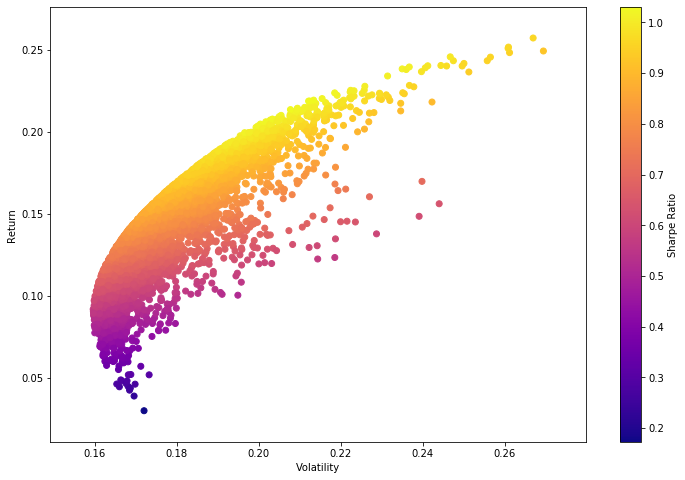

In [122]:
plt.figure(figsize=(12,8));
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

ValueError: x and y must have same first dimension, but have shapes (0,) and (100,)

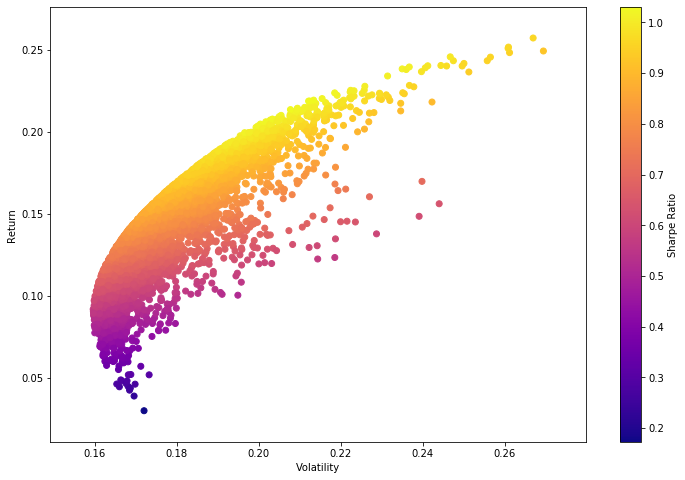

In [125]:
plt.figure(figsize=(12,8));
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

plt.plot(frontier_volatility,frontier_y,'g--',lw=3);

In [108]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
...                options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31


In [112]:
opt_results=minimize(negative_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

ValueError: only 2 non-keyword arguments accepted

In [126]:
#Capital Asset Pricing Model

In [127]:
from scipy import stats

In [129]:
import pandas as pd
import pandas_datareader as web

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [130]:
import pandas.testing
from pandas.util.testing import assert_frame_equal

In [132]:
spy_etf=web.DataReader('SPY','yahoo')

In [133]:
spy_etf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,210.850006,208.899994,210.009995,210.630005,78264600.0,190.602768
2015-04-23,211.940002,210.009995,210.149994,211.160004,102585900.0,191.082367
2015-04-24,211.970001,211.110001,211.660004,211.649994,61327400.0,191.525772
2015-04-27,212.479996,210.539993,212.330002,210.770004,79358100.0,190.729431
2015-04-28,211.500000,209.330002,210.740005,211.440002,86863500.0,191.335770
...,...,...,...,...,...,...
2020-04-13,277.510010,271.410004,277.140015,275.660004,114839100.0,275.660004
2020-04-14,284.899994,275.510010,280.980011,283.790009,134143400.0,283.790009
2020-04-15,283.940002,275.459991,277.570007,277.760010,121775000.0,277.760010


In [135]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2015-04-22 to 2020-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1257 non-null   float64
 1   Low        1257 non-null   float64
 2   Open       1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Volume     1257 non-null   float64
 5   Adj Close  1257 non-null   float64
dtypes: float64(6)
memory usage: 68.7 KB


In [136]:
start=pd.to_datetime('2015-04-22')
end=pd.to_datetime('2020-04-17')

In [137]:
appl=web.DataReader('AAPL','yahoo',start,end)

In [148]:
amzn=web.DataReader('AMZN','yahoo',start,end)

In [149]:
tsla=web.DataReader('TSLA','yahoo',start,end)

In [151]:
amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,394.279999,388.000000,391.910004,389.799988,3474700,389.799988
2015-04-23,391.880005,386.149994,390.209991,389.989990,7980000,389.989990
2015-04-24,452.649994,439.000000,439.000000,445.100006,17176900,445.100006
2015-04-27,446.989990,437.410004,443.859985,438.559998,5430900,438.559998
2015-04-28,439.000000,428.040009,438.510010,429.309998,4140500,429.309998
...,...,...,...,...,...,...
2020-04-13,2180.000000,2038.000000,2040.000000,2168.870117,6716700,2168.870117
2020-04-14,2292.000000,2186.209961,2200.469971,2283.320068,8087200,2283.320068
2020-04-15,2333.370117,2245.000000,2257.679932,2307.679932,6866600,2307.679932


In [150]:
tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,221.880005,211.690002,212.500000,219.440002,7863000,219.440002
2015-04-23,221.479996,217.149994,218.270004,218.600006,4411200,218.600006
2015-04-24,220.800003,218.009995,220.500000,218.429993,2427800,218.429993
2015-04-27,238.750000,222.000000,222.559998,231.550003,11672600,231.550003
2015-04-28,235.500000,228.029999,234.750000,230.479996,6085400,230.479996
...,...,...,...,...,...,...
2020-04-13,652.000000,580.530029,590.159973,650.950012,22475400,650.950012
2020-04-14,741.880005,692.429993,698.969971,709.890015,30576500,709.890015
2020-04-15,753.130005,710.000000,742.000000,729.830017,23577000,729.830017


In [147]:
appl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-22,128.869995,126.320000,126.989998,128.619995,37654500.0,118.363777
2015-04-23,130.419998,128.139999,128.300003,129.669998,45770900.0,119.330048
2015-04-24,130.630005,129.229996,130.490005,130.279999,44525900.0,119.891411
2015-04-27,133.130005,131.149994,132.309998,132.649994,96954200.0,122.072395
2015-04-28,134.539993,129.570007,134.460007,130.559998,118924000.0,120.149078
...,...,...,...,...,...,...
2020-04-13,273.700012,265.829987,268.309998,273.250000,32755700.0,273.250000
2020-04-14,288.250000,278.049988,280.000000,287.049988,48748700.0,287.049988
2020-04-15,286.329987,280.630005,282.399994,284.429993,32788600.0,284.429993


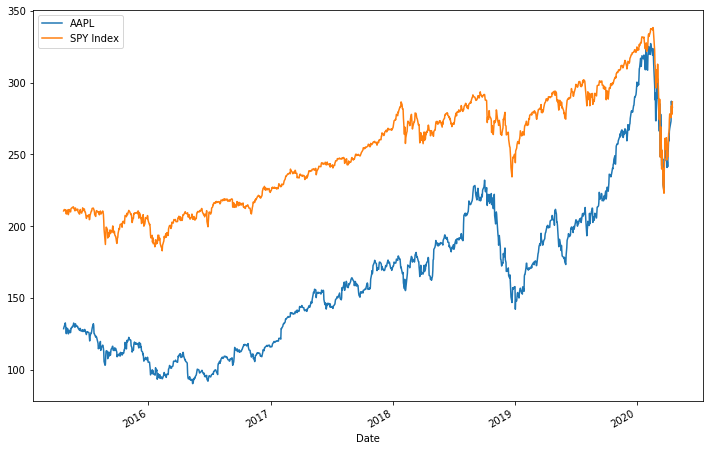

In [162]:
appl['Close'].plot(label='AAPL',figsize=(12,8));
#amzn['Close'].plot(label='AMZN',figsize=(12,8));
#tsla['Close'].plot(label='TSLA',figsize=(12,8));
spy_etf['Close'].plot(label='SPY Index');
plt.legend();

In [166]:
appl['Cumulative']=appl['Close']/appl['Close'].iloc[0]
spy_etf['Cumulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]

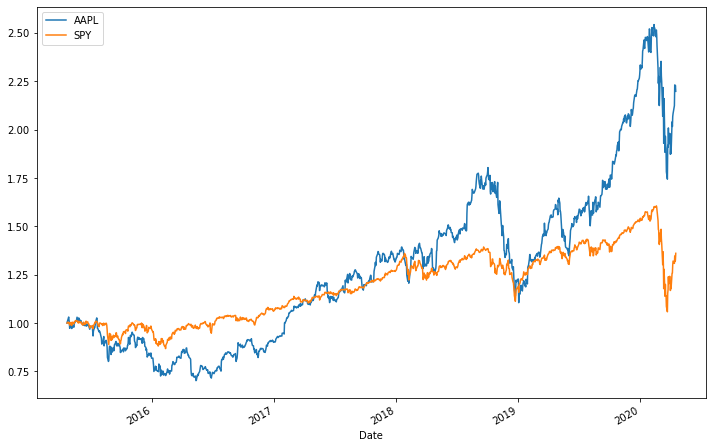

In [167]:
appl['Cumulative'].plot(label='AAPL',figsize=(12,8));
spy_etf['Cumulative'].plot(label='SPY');
plt.legend();

In [168]:
appl['Daily Return']=appl['Close'].pct_change(1)
spy_etf['Daily Return']=spy_etf['Close'].pct_change(1)

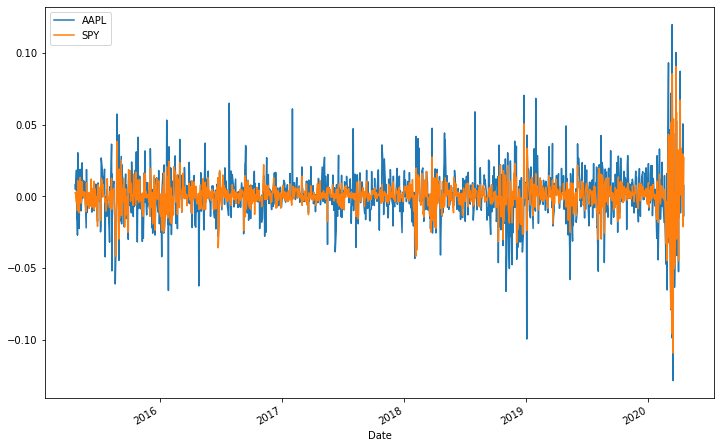

In [174]:
appl['Daily Return'].plot(label='AAPL',figsize=(12,8));
spy_etf['Daily Return'].plot(label='SPY');
plt.legend();

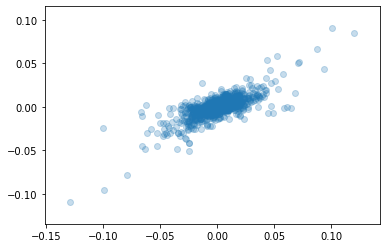

In [173]:
plt.scatter(appl['Daily Return'],spy_etf['Daily Return'],alpha=0.25);

In [178]:
beta,alpha,r_value,p_value,std_err=stats.linregress(appl['Daily Return'].iloc[1:],
                                                    spy_etf['Daily Return'].iloc[1:])

In [179]:
beta

0.4937774582417887

In [180]:
alpha

-7.690418805532975e-05

In [181]:
r_value

0.7653093198960403

In [182]:
p_value

3.358673223609117e-242

In [183]:
spy_etf['Daily Return'].head()

Date
2015-04-22         NaN
2015-04-23    0.002516
2015-04-24    0.002320
2015-04-27   -0.004158
2015-04-28    0.003179
Name: Daily Return, dtype: float64

In [184]:
import numpy as np

In [185]:
noise=np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [186]:
noise

array([ 0.00092202,  0.00099047, -0.00140432, ..., -0.00018591,
        0.00011078, -0.00099734])

In [187]:
spy_etf['Daily Return'].iloc[1:]+noise

Date
2015-04-23    0.003438
2015-04-24    0.003311
2015-04-27   -0.005562
2015-04-28    0.002762
2015-04-29   -0.004605
                ...   
2020-04-13   -0.008474
2020-04-14    0.029602
2020-04-15   -0.021434
2020-04-16    0.004935
2020-04-17    0.026018
Name: Daily Return, Length: 1256, dtype: float64

In [188]:
fake_stock=spy_etf['Daily Return'].iloc[1:]+noise

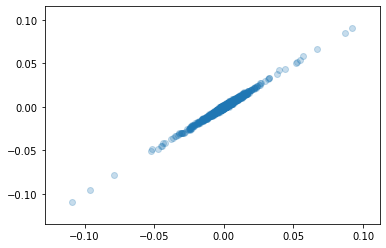

In [191]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25);

In [192]:
beta,alpha,r_value,p_value,std_err=stats.linregress(fake_stock,
                                                    spy_etf['Daily Return'].iloc[1:])

In [193]:
beta

0.9897411105811078

In [194]:
alpha

6.409623355115165e-06

In [195]:
r_value

0.9964065428961173

In [196]:
p_value

0.0